<a href="https://colab.research.google.com/github/coda-nsit/kaggle/blob/master/ImageClassification_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/ifood-2019-fgvc6/data
118400

# Install tensorflow latest version (Don't do this, retrain.py will not work for 2.0.0)

In [1]:
!pip uninstall tensorflow
!pip install tensorflow==2.0.0

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 86.3MB 131kB/s 
     |████████████████████████████████| 3.8MB 32.6MB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 wh

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

# Import libraries and extract .zip folders

In [0]:
pip install tensorflow==1.7.*

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import seaborn as sb
import cv2
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from IPython.display import Image

import scipy.io

import tensorflow_datasets as tfds

import os

In [6]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
!ls
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle

kaggle.json  sample_data


In [0]:
%%capture
!kaggle competitions download -c ifood-2019-fgvc6

In [9]:
!ls
!ls /root/.kaggle

class_list.txt			 sample_data	       train_set.zip
ifood2019_sample_submission.csv  test_set.zip	       val_labels.csv
kaggle.json			 train_labels.csv.zip  val_set.zip
kaggle.json


In [0]:
!unzip -q train_set.zip
!unzip -q train_labels.csv.zip

In [0]:
!unzip -q val_set.zip
!unzip -q test_set.zip

# Explore the data

total categories

In [12]:
!cat class_list.txt | wc -l

251


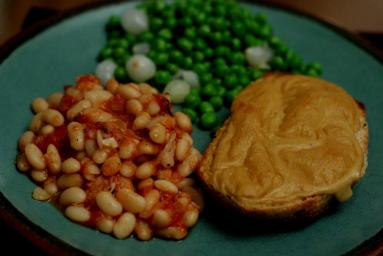

In [13]:
Image("test_set/test_011489.jpg")

load the dataset into dataframe

In [0]:
train_labels = pd.read_csv("train_labels.csv")
val_labels = pd.read_csv("val_labels.csv")

## Explore label distribution

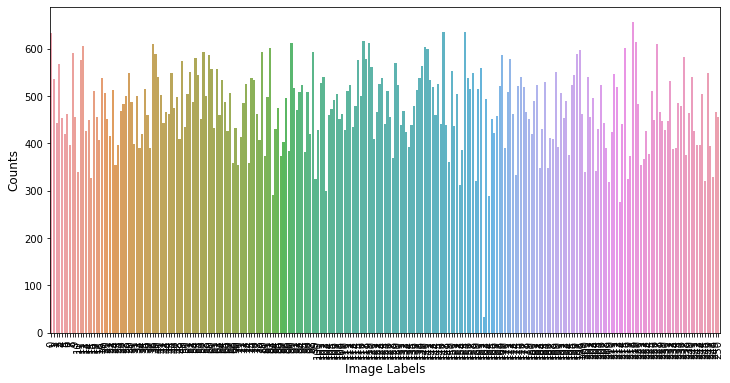

In [15]:
label_counts = train_labels.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

## Make 1 folder for each label and move images from train_set

In [0]:
label_names = []
label_idxs = []
with open("class_list.txt") as label_file:
  for line in label_file:
    idx, label = line.split(" ")
    label_names.append(label)
    label_idxs.append(idx)

In [0]:
curr_dir = os.getcwd()
os.mkdir(curr_dir + "/" + "folder-per-images")
for label in label_idxs:
  os.mkdir(curr_dir + "/" + "folder-per-images" + "/" + label)

In [18]:
display(train_labels.head())
train_labels_lists = train_labels.values.tolist()

,img_name,label
0,train_101733.jpg,211
1,train_101734.jpg,211
2,train_101735.jpg,211
3,train_101736.jpg,211
4,train_101737.jpg,211


In [0]:
for train_label in train_labels_lists:
  img_name = train_label[0]
  idx = train_label[1]
  Path(curr_dir + "/" + "train_set" + "/" + img_name).rename(curr_dir + "/" + "folder-per-images" + "/" + str(idx) + "/" + img_name)

# Get InceptionV3 model

In [20]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, numpy, gast, termcolor, keras-applications, opt-einsum, protobuf, absl-py, tensorflow-estimator, google-pasta, wrapt, six, grpcio, astor, tensorboard, wheel
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
%%capture
!mkdir -p example_code
%pushd example_code
!wget https://github.com/tensorflow/hub/raw/master/examples/image_retraining/retrain.py
%popd

In [22]:
!python example_code/retrain.py --image_dir /content/folder-per-images/



W1127 02:27:12.129058 140593353533312 module_wrapper.py:139] From example_code/retrain.py:917: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.


W1127 02:27:12.129365 140593353533312 module_wrapper.py:139] From example_code/retrain.py:919: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1127 02:27:12.129796 140593353533312 module_wrapper.py:139] From example_code/retrain.py:168: The name tf.gfile.Walk is deprecated. Please use tf.io.gfile.walk instead.

I1127 02:27:13.385876 140593353533312 retrain.py:185] Looking for images in '0'

W1127 02:27:13.386206 140593353533312 module_wrapper.py:139] From example_code/retrain.py:188: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.

I1127 02:27:13.421822 140593353533312 retrain.py:185] Looking for images in '1'
I1127 02:27:13.450195 140593353533312 retrain.py:185] Looking for images in '10'
I1127 02:27:13.467689 140593353533312 retrain.py:185] Look

# Save the model to drive (Not Done)

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/"My Drive"/"Machine Learning"/Models

# Tensorboard

In [0]:
!cp /tmp/output_graph.pb output_graph.pb 

# Rough

In [0]:
!wget https://raw.githubusercontent.com/wisdal/Image-classification-transfer-learning/master/retrain.py

In [47]:
!which python

/usr/local/bin/python


In [56]:
!ls ../usr/local/include/python3.6/

greenlet.h


In [30]:
!ls /usr/local/lib/python3.6/dist-packages/tensorflow_hub/tools/make_image_classifier

__init__.py		      make_image_classifier.py
make_image_classifier_lib.py  __pycache__


In [0]:
!ls /usr/local/lib/python3.6/dist-packages/

In [62]:
!pip uninstall tensorflow_estimator
!pip install tensorflow_estimator

Uninstalling tensorflow-estimator-2.0.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/tensorflow_estimator-2.0.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-estimator-2.0.1
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl


In [0]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

In [0]:
!grep -R quantize /usr/local/lib/python3.6/dist-packages/tensorflow_core/

In [0]:
!cat /usr/local/lib/python3.6/dist-packages/tensorflow_core/tools/compatibility/renames_v2.py

In [13]:
!git clone https://github.com/googlecodelabs/tensorflow-for-poets-2

Cloning into 'tensorflow-for-poets-2'...
remote: Enumerating objects: 426, done.
remote: Total 426 (delta 0), reused 0 (delta 0), pack-reused 426
Receiving objects: 100% (426/426), 33.97 MiB | 31.76 MiB/s, done.
Resolving deltas: 100% (159/159), done.


In [14]:
%cd tensorflow-for-poets-2

/content/tensorflow-for-poets-2
